In [14]:
%matplotlib inline

from modsim import *

#EVERYTHING IN SI UNITS, celcius


##################THINGS TO CHANGE######################
c_r = 30 #Rate of heat transfer from coffee to air (Joules/minute)
c_m = .200 #Mass (kg)


w_r = 30 #Rate of heat transfer from coffee to ice (Joules/minute)
w_m = .01 #Mass (kg)

##################INITIAL CONDITIONS######################
c_J_init = State(nrg = 0)
c_T_init = State(temp = 90)


w_J_init = State(nrg = 0)
w_T_init = State(temp = -18.0)

##################SYSTEMS######################
Coffee = System(n = 'Coffee',
               m = c_m, r = c_r,
               J_init = c_J_init, T_init = c_T_init)
#H2O in any form

Water = System(n = 'Water',
               m = w_m, r = w_r, 
               J_init = w_J_init, T_init = w_T_init)

##################SIMULATION VARIABLES######################
dt = 1
t0 = 0
t_end = 50
T_env = 23


"""
def heat_ice(system):
    unpack(system)
    heat_needed = m*i.c*(i.T_final-i.T_init)
    return heat_needed
def heat_water(system):
    unpack(system)
    heat_needed = m*w.c*(w.T_final-w.T_init)
    return heat_needed
def melt(system):
    unpack(system)
    heat_needed = m*L
    return heat_needed
"""

'\ndef heat_ice(system):\n    unpack(system)\n    heat_needed = m*i.c*(i.T_final-i.T_init)\n    return heat_needed\ndef heat_water(system):\n    unpack(system)\n    heat_needed = m*w.c*(w.T_final-w.T_init)\n    return heat_needed\ndef melt(system):\n    unpack(system)\n    heat_needed = m*L\n    return heat_needed\n'

In [15]:
def convert_to_Temp(system):
    unpack(system)
    frame = TimeFrame(columns=T_init.index)
    frame.loc[t0] = State(temp = convert_joules_to_temp(J_init.nrg))
    ts = linrange(t0, t_end, dt)
    for t in ts:
        frame.loc[t+dt] = State(temp=convert_joules_to_temp(Water.results.loc[t].nrg))
    system.newResults = frame

NameError: name 'w' is not defined

NameError: name 'L' is not defined

In [16]:
def update(state, system):
    """Update the thermal transfer model.
    
    state: State (temp)
    system: System object
    
    returns: State (temp)
    """
    unpack(system)
    T = state.temp
    T += -r * (T - T_env) * dt

    return State(temp=T)

In [17]:
def convert_joules_to_temp(j, system):
    if system.n == 'Water':
        if(j < 379.44):
            t = (j -379.44) * 18 / 379.44
        elif(j >= 379.44 and j < (379.44 + 33333.33)):
            t = 0
        else:
            t = (j - (379.44+33333.33)) / 963.01 * 23
        return t
    elif system.n == 'Coffee':
        t = c_T_init - ((c_J_init - j)/(m * 4187)) 
        return t

In [18]:
convert_joules_to_temp(33333.33+963.01+379.44, Water)

#convert_temp_to_joules(33333.33+963.01+379.44)

23.00000000000005

In [19]:
def update(state1,state2,system):
    """Update the thermal transfer model.
    
    state: State (temp)
    system: System object
    
    returns: State (temp)
    """
    unpack(system)
    J = state1.nrg
    J += -1 * r * (state2.temp - T_env) * dt
    return State(nrg = J)

In [22]:
def run_simulation1(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    unpack(system)
    
    frame = TimeFrame(columns=J_init.index)
    frame.loc[t0] = J_init
    
    ts = linrange(t0, t_end, dt)
    frame2 = TimeFrame(columns=T_init.index)
    frame2.loc[t0] = State(temp = convert_joules_to_temp(J_init.nrg,system))
    for t in ts:
        frame.loc[t+dt] = update_func(frame.loc[t],frame2.loc[t], system)
        frame2.loc[t+dt] = State(temp=convert_joules_to_temp(frame.loc[t].nrg,system))
    system.results = frame
    system.newResults = frame2

In [23]:
run_simulation1(Water,update)

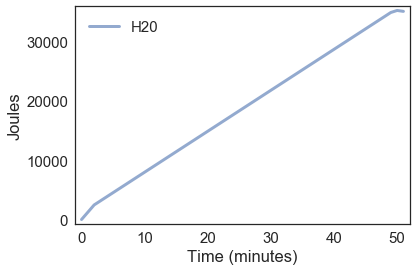

In [24]:
plot(Water.results.nrg, label='H20')
decorate(xlabel='Time (minutes)',
         ylabel='Joules')

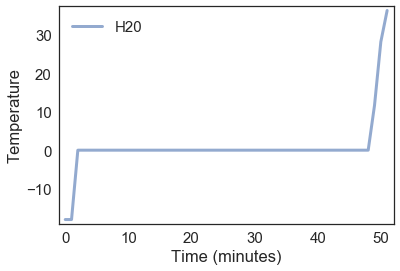

In [25]:
plot(Water.newResults.temp, label='H20')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature')